In [1]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import *


# q1 and baseliens curves

/Users/yuanmingqi/miniconda3/envs/rllte/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yuanmingqi/miniconda3/envs/rllte/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/yuanmingqi/miniconda3/envs/rllte/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/yuanmingqi/miniconda3/envs/rllte/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/yuanmingqi/miniconda3/envs/rllte/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


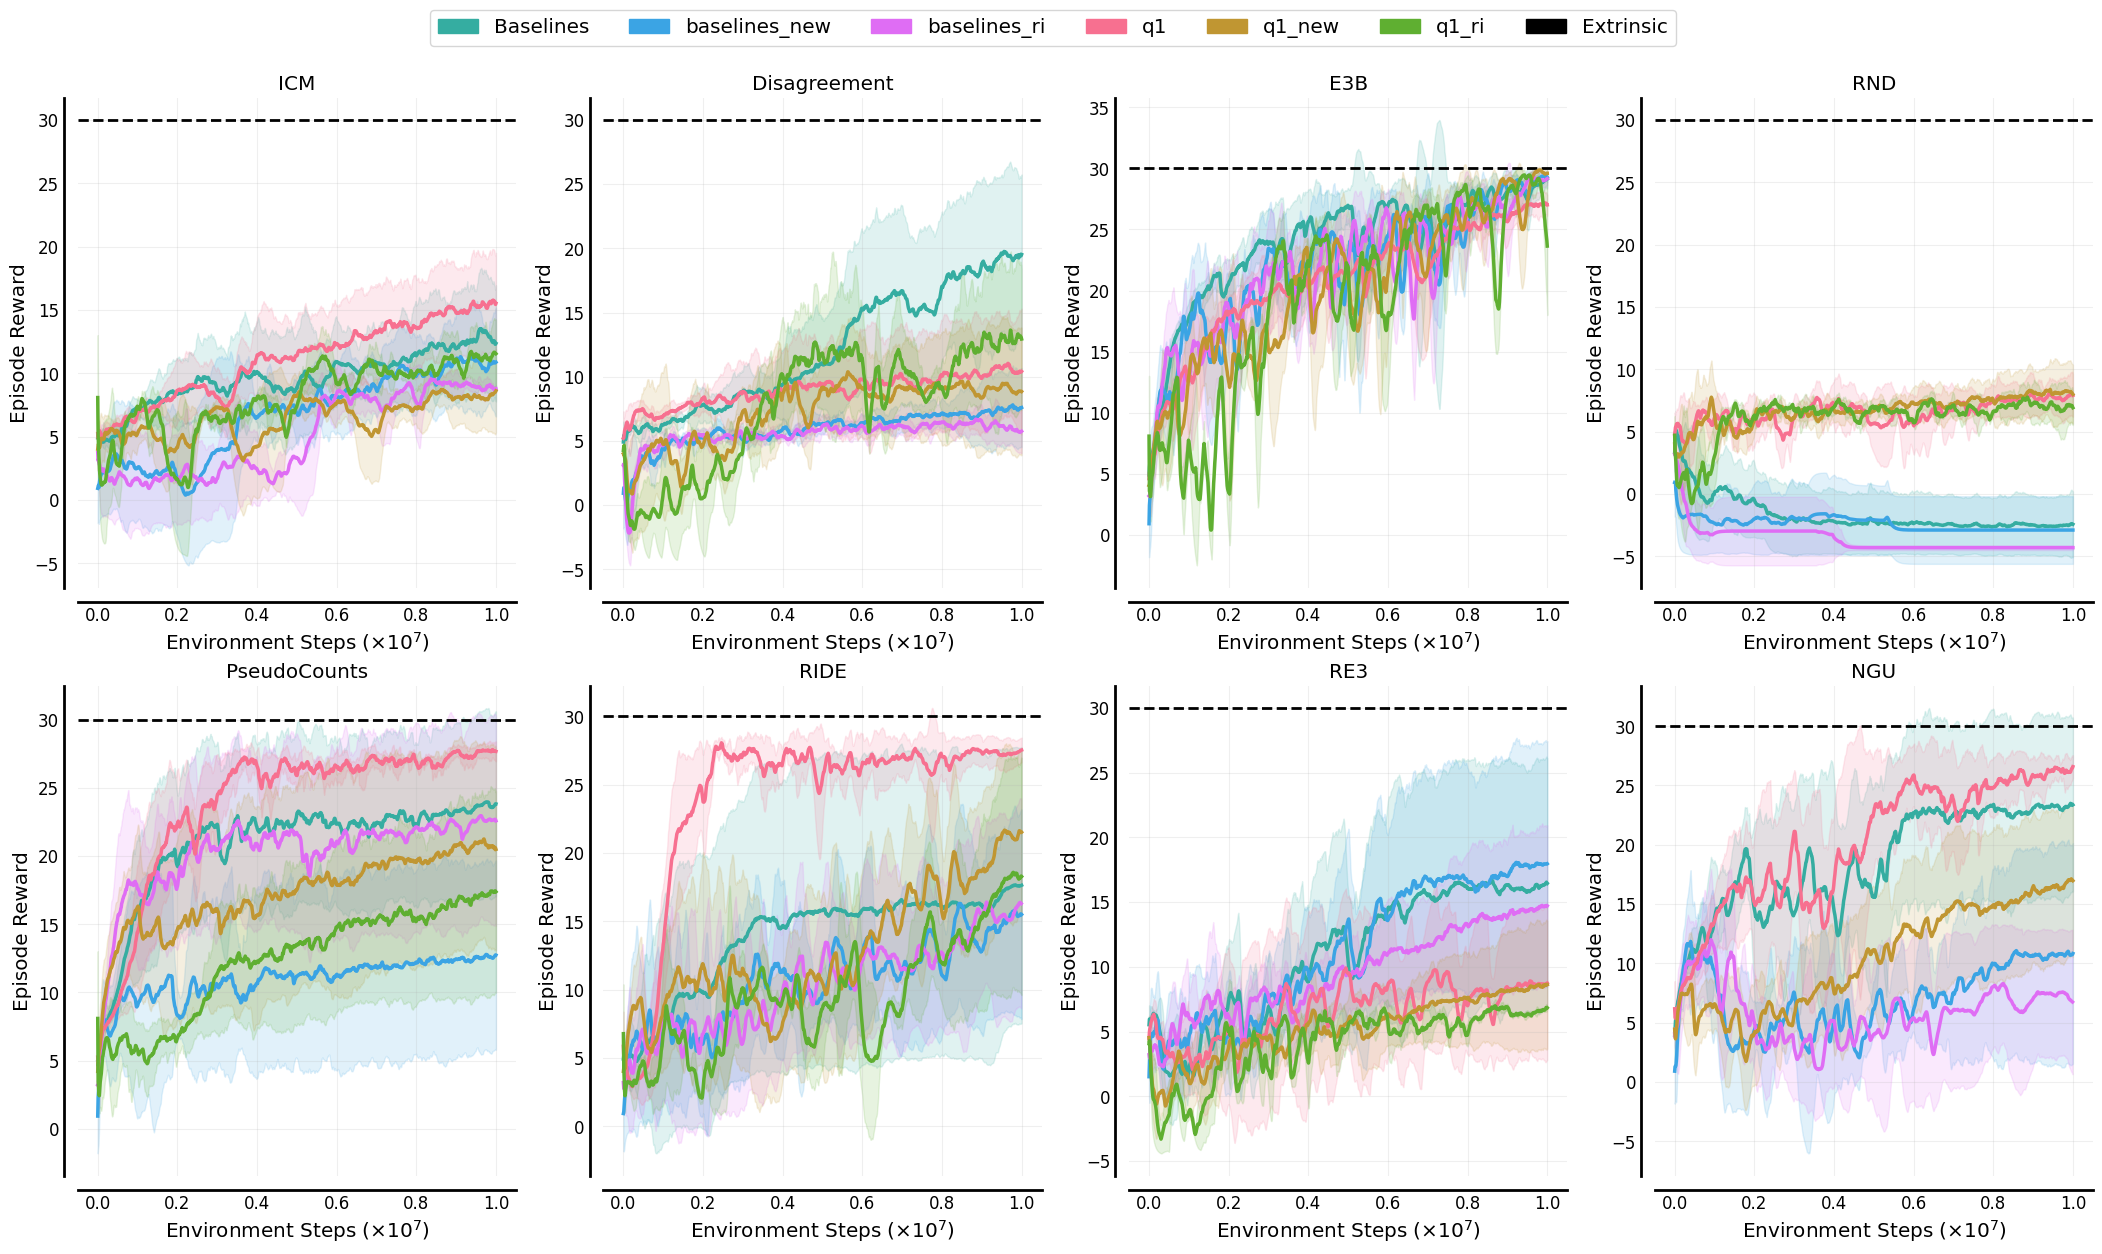

In [5]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['baselines', 'baselines_new','baselines_ri', 'q1', 'q1_new', 'q1_ri']
legends = ['Baselines', 'baselines_new', 'baselines_ri', 'q1', 'q1_new', 'q1_ri', 'Extrinsic']
colors = sns.husl_palette(len(candidates), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(candidates)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

fig, axes = plt.subplots(2, 4, figsize=(26, 14))

for subplot_idx, candidate in enumerate(candidates):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/{candidate}/"
    num_points = 1000
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = smooth(data, 0.99)
                # data = moving_average(data, 3000)
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        # print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1.0, num_points)
        if subplot_idx == 0:
            ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
        try:
            ax.plot(x, mean, linewidth=2.5, c=colors[subplot_idx], label=legends[subplot_idx])
        except:
            pass
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        # ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))

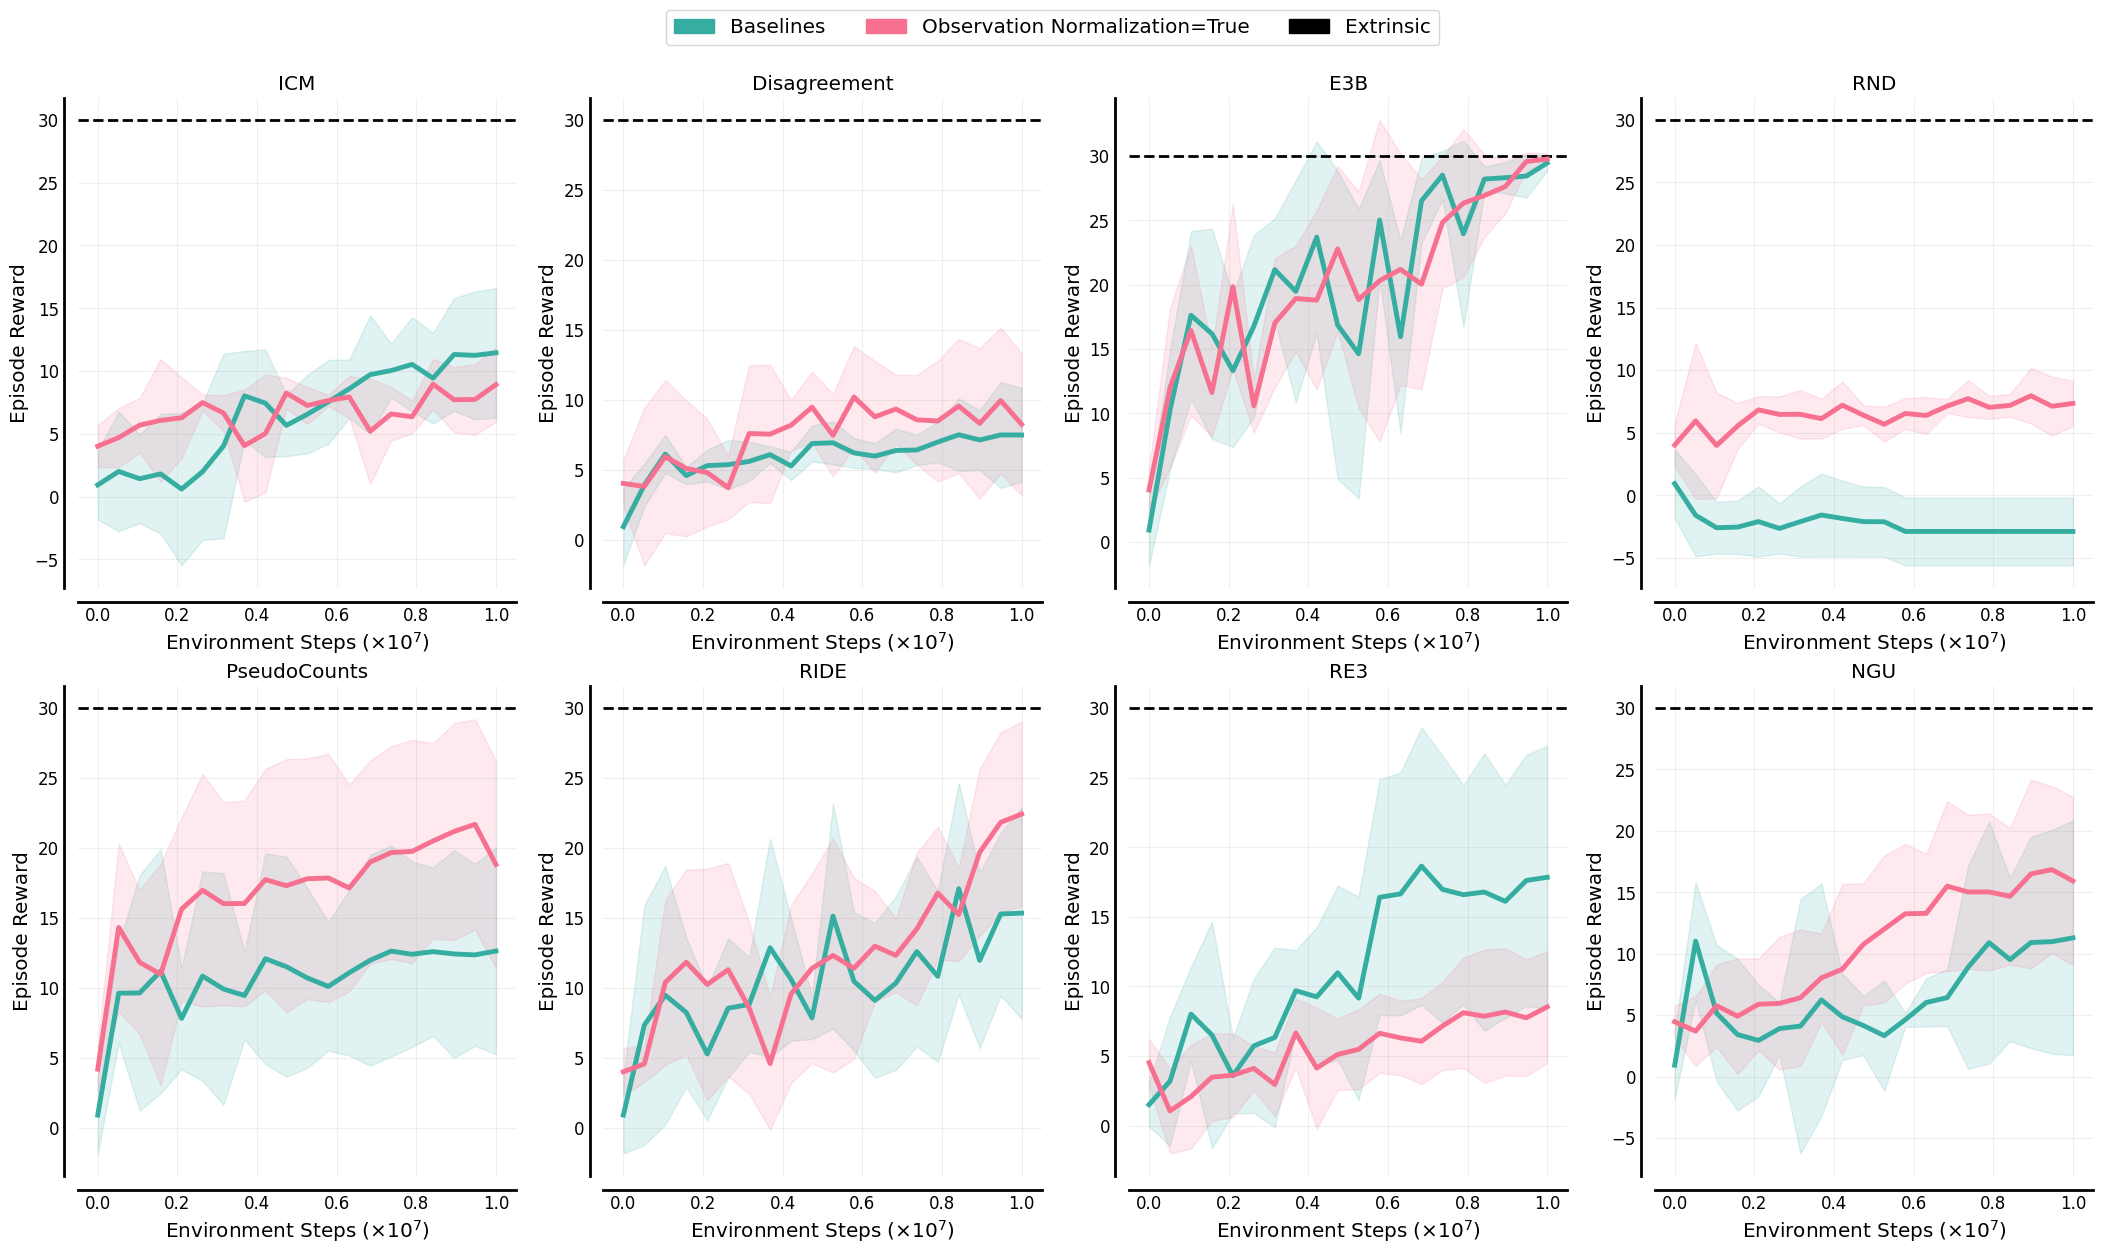

In [7]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['baselines_new', 'q1_new']
legends = ['Baselines', 'Observation Normalization=True', 'Extrinsic']
colors = sns.husl_palette(len(candidates), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(candidates)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

fig, axes = plt.subplots(2, 4, figsize=(26, 14))

for subplot_idx, candidate in enumerate(candidates):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/{candidate}/"
    num_points = 20
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)].to_numpy()
                # data = smooth(data, 0.6)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        # print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1.0, all_data[algo].shape[1])
        if subplot_idx == 0:
            ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
        ax.plot(x, mean, linewidth=3.5, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        # ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq1_curves.pdf', bbox_inches='tight', dpi=300)

In [3]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['baselines_new', 'q1_new']

all_data = {candidate: {algo: [] for algo in algos} for candidate in candidates}
for subplot_idx, candidate in enumerate(candidates):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/{candidate}/"

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                # average of the last 50 episodes
                all_data[candidate][algo].append(data[-50:].mean())

        all_data[candidate][algo] = np.expand_dims(np.array(all_data[candidate][algo]), axis=1)

for algo in algos:
    perf1 = Performance(all_data['baselines_new'][algo])
    perf2 = Performance(all_data['q1_new'][algo])
    perf1_iqm = perf1.aggregate_iqm().round(4)
    perf2_iqm = perf2.aggregate_iqm().round(4)
    perf1_mean = perf1.aggregate_mean().round(4)
    perf2_mean = perf2.aggregate_mean().round(4)
    best_candidate_iqm = np.argmax([perf1_iqm, perf2_iqm])
    best_candidate_mean = np.argmax([perf1_mean, perf2_mean])
    # find the best candidate by comparing the iqm
    print(algo, perf1_iqm, perf2_iqm, candidates[best_candidate_iqm], perf1_mean, perf2_mean, candidates[best_candidate_mean])

ICM 10.0097 8.452 baselines_new 10.8389 8.894 baselines_new
Disagreement 6.3793 7.1664 q1_new 7.7593 8.8411 q1_new
E3B 29.2745 29.9228 q1_new 29.2206 29.714 q1_new
RND -4.15 7.4805 q1_new -2.896 7.731 q1_new
PseudoCounts 10.1994 22.672 q1_new 12.9992 20.3557 q1_new
RIDE 15.033 23.0837 q1_new 15.6833 21.3148 q1_new
RE3 18.4683 7.1887 baselines_new 17.9687 8.6897 baselines_new
NGU 8.5114 15.7689 q1_new 11.0132 16.9257 q1_new


baselines ICM (5, 10)
baselines Disagreement (5, 10)
baselines E3B (5, 10)
baselines RND (5, 10)
baselines PseudoCounts (5, 10)
baselines RIDE (5, 10)
baselines RE3 (5, 10)
baselines NGU (5, 10)
q1 ICM (5, 10)
q1 Disagreement (5, 10)
q1 E3B (5, 10)
q1 RND (5, 10)
q1 PseudoCounts (5, 10)
q1 RIDE (5, 10)
q1 RE3 (5, 10)
q1 NGU (5, 10)


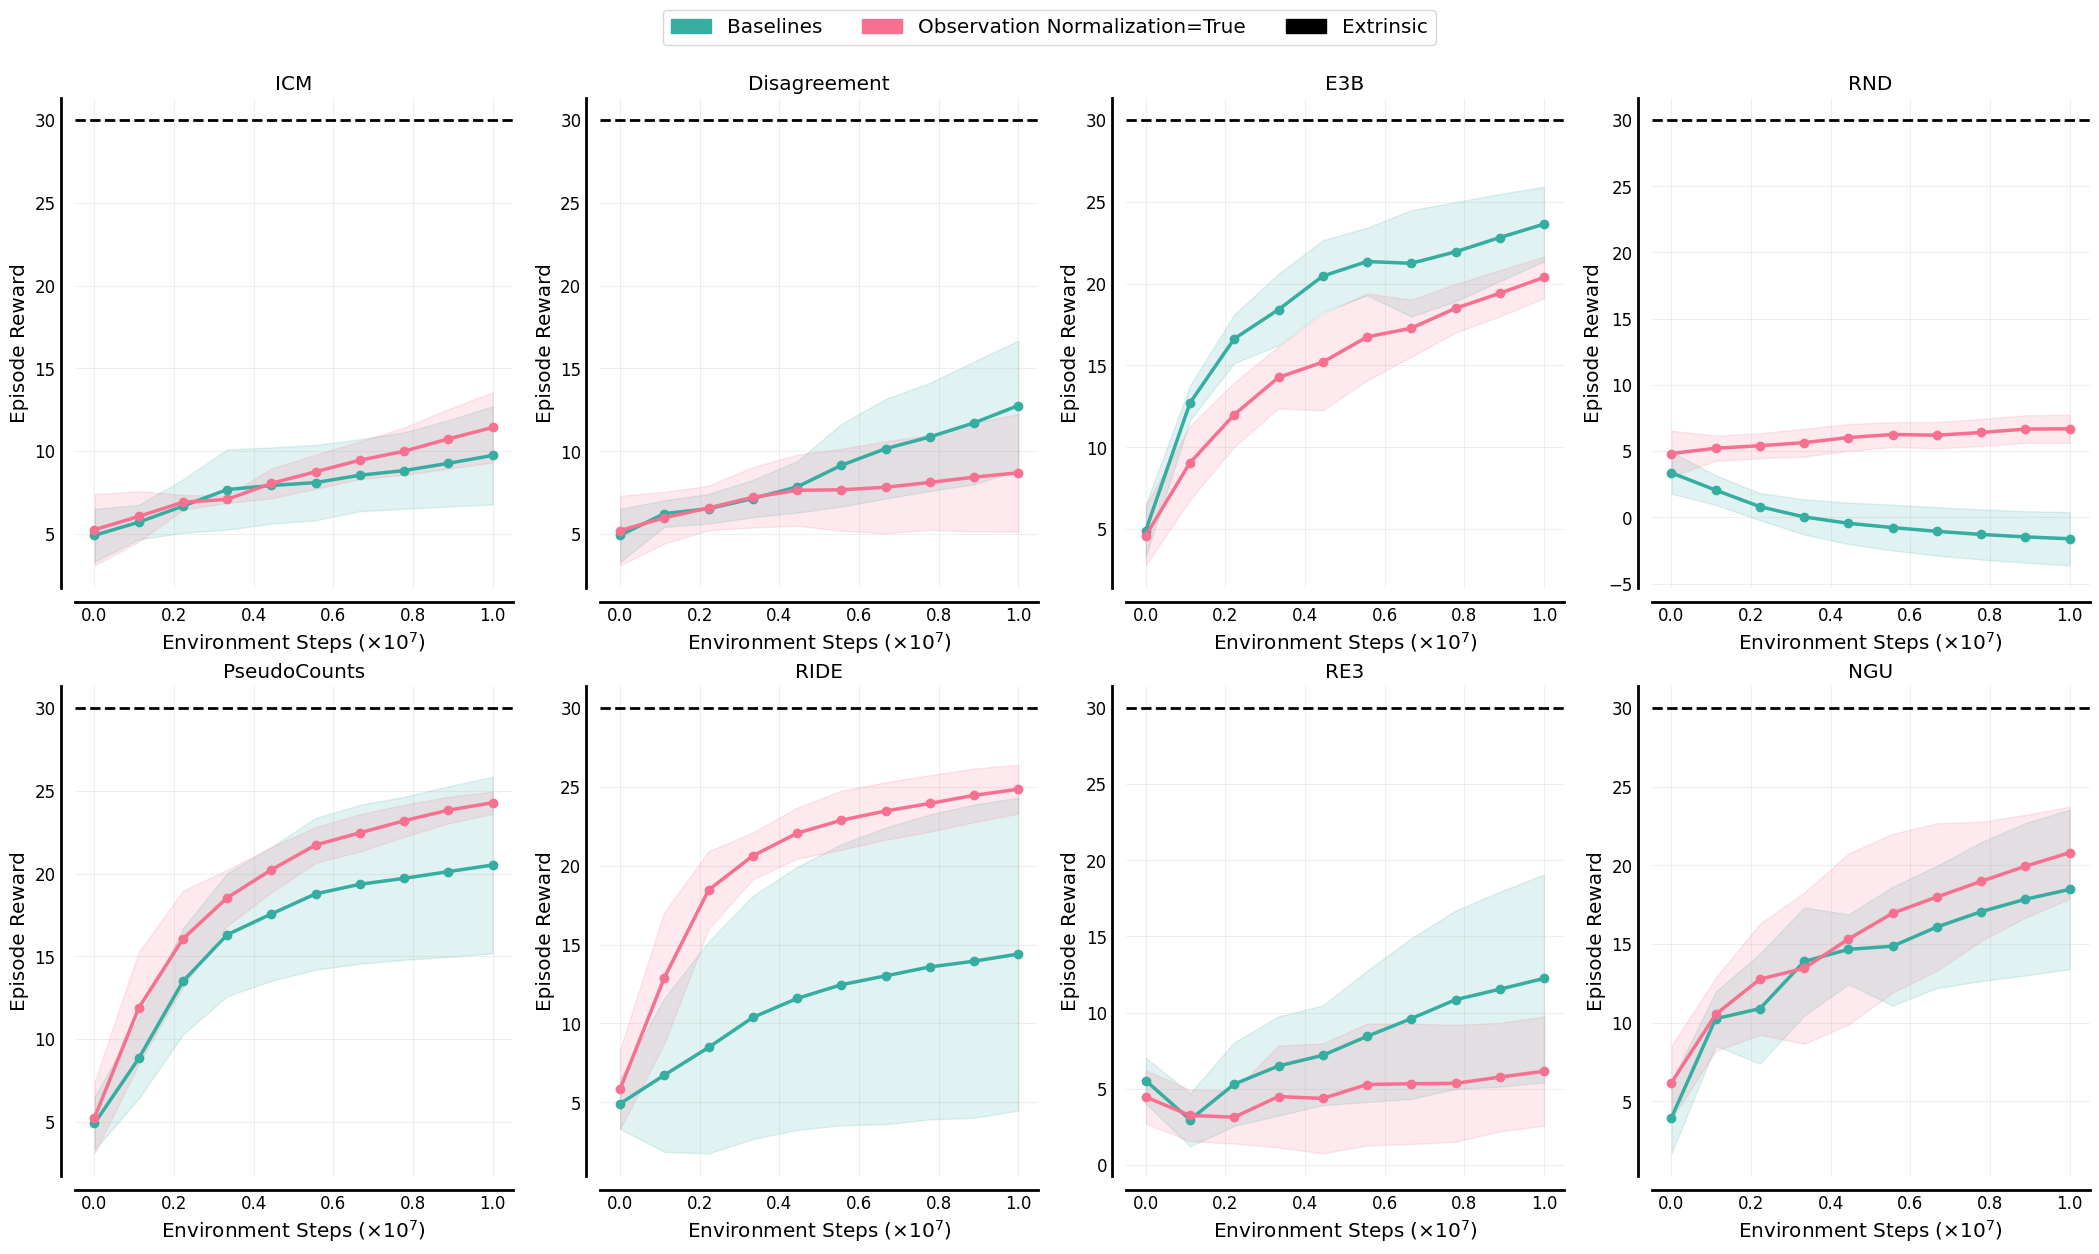

In [16]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['baselines', 'q1']
legends = ['Baselines', 'Observation Normalization=True', 'Extrinsic']
colors = sns.husl_palette(len(candidates), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(candidates)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

fig, axes = plt.subplots(2, 4, figsize=(26, 14))

for subplot_idx, candidate in enumerate(candidates):
    root = f"./data/{candidate}/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1.0, num_points)
        if subplot_idx == 0:
            ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        # ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq1_curves.pdf', bbox_inches='tight', dpi=300)

In [1]:
# algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
# titles = ['Baselines', 'Observation Normalization']
# # colors = sns.color_palette("husl", len(algos))
# colors = sns.husl_palette(len(algos), h=.5)
# fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# for subplot_idx, candidate in enumerate(['baselines', 'q1']):
#     root = f"./data/{candidate}/"
#     num_points = 10
#     all_data = {algo: [] for algo in algos}

#     ax = axes[subplot_idx]

#     for algo in algos:
#         for dir in os.listdir(root):
#             if algo.lower() in dir:
#                 file = f"{root}/{dir}/"
#                 file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
#                 data = pd.read_csv(file)['episode_reward']
#                 data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
#                 data = smooth(data, 0.95)
#                 all_data[algo].append(data)

#         all_data[algo] = np.array(all_data[algo])

#     x = np.linspace(0, 1, num_points)
#     ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
#     for algo, color in zip(algos, colors):
#         mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
#         ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=color, label=algo)
#         ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=color)

#     ax.set_title(titles[subplot_idx], fontsize="x-large")
#     ax = _annotate_and_decorate_axis(ax, 
#                                     ticklabelsize="large",
#                                     xlabel=r"Environment Steps ($\times 10^7$)", 
#                                     ylabel="Episode Reward",
#                                     xticklabels=np.linspace(0, 1, num_points),
#                                     )
# fig.legend(fake_patches, algos, loc='upper center', 
#     fancybox=True, ncol=4,
#     fontsize='x-large',
#     bbox_to_anchor=(0.5, 1.1))
# fig.savefig('figure_baselines_q1_curves.pdf', bbox_inches='tight', dpi=300)